# Road

In [2]:
# Import Libraries
import os
import sys

os.environ["USE_PYGEOS"] = "0"
import geopandas as gpd

# import pandas as pd
import rasterio
import matplotlib.pyplot as plt

# Go into folder road from current folder
os.chdir(r"D:\OneDrive\ETH\FS25\01_Master_Project\20_Code\infraScan\infraScanRoad")
print(os.getcwd())

# ------------------------------ Limits ------------------------------ #

# Define spatial limits of the research corridor
e_min, e_max = 2687000, 2708000  # 2688000, 2704000 - 2688000, 2705000
n_min, n_max = 1237000, 1254000  # 1238000, 1252000 - 1237000, 1252000
limits_corridor = [e_min, n_min, e_max, n_max]


# Function that adds the limits as the plot boundary (replaces plt.show())
def plot_limits(ax):
    ax.set_xlim(e_min, e_max)
    ax.set_ylim(n_min, n_max)
    ax.set_aspect("equal", adjustable="box")

D:\OneDrive\ETH\FS25\01_Master_Project\20_Code\infraScan\infraScanRoad


In [3]:
network = gpd.read_file(r"data/temp/network_highway.gpkg")
# Get Link data
new_links = gpd.read_file(r"data/Network/processed/new_links_new_connections.gpkg")

new_links_realistic = gpd.read_file(r"data/Network/processed/new_links_realistic_new_connections.gpkg")

nodes = gpd.read_file(r"data/Network/processed/points_with_attribute.gpkg")

with rasterio.open(r"data/landuse_landcover/processed/zone_no_infra/protected_area_corridor.tif") as src:
    protected_area = src.read(1)
    protected_area_meta = src.meta
    extent = [src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]

buffer = 2000


C:\Users\sevih\AppData\Local\Temp\ipykernel_10344\2786170186.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nodes.buffer(buffer).plot(ax=ax, color="blue", alpha=0.1)


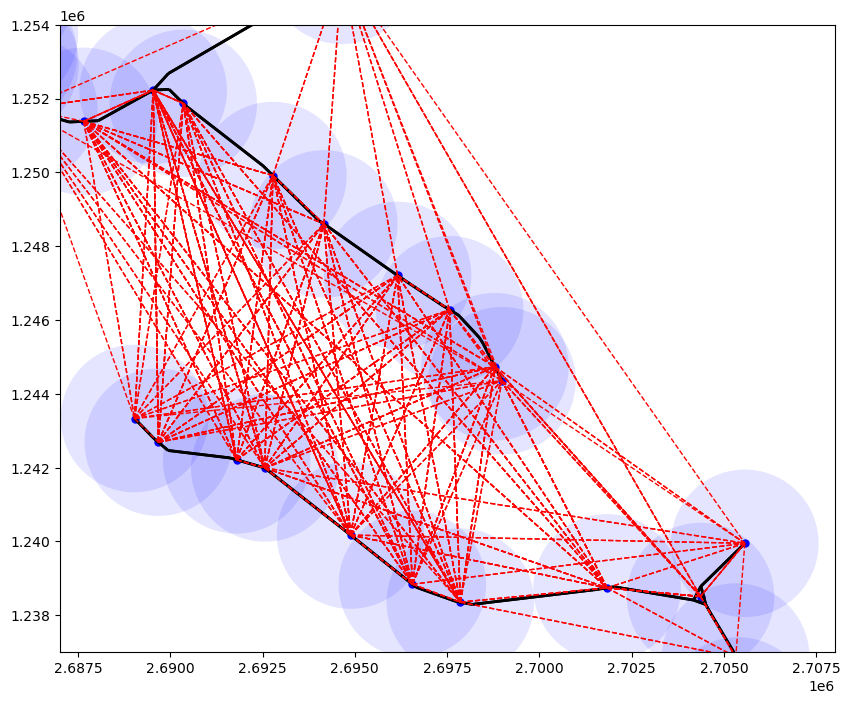

In [4]:
# Plot network, nodes and new links
fig, ax = plt.subplots(figsize=(10, 10))
network.plot(ax=ax, color="black", linewidth=2)
nodes.plot(ax=ax, color="blue", markersize=25)
nodes.buffer(buffer).plot(ax=ax, color="blue", alpha=0.1)
new_links.plot(ax=ax, color="red", linestyle="--", linewidth=1)
plot_limits(ax)
plt.show()

C:\Users\sevih\AppData\Local\Temp\ipykernel_10344\3309781328.py:14: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  endpoints = endpoints.explode()


                          geometry
0  POINT (2626913.130 1257651.000)
1  POINT (2649469.864 1259366.381)
2  POINT (2649469.864 1259366.381)
3  POINT (2658816.800 1255943.490)
4  POINT (2658816.800 1255943.490)


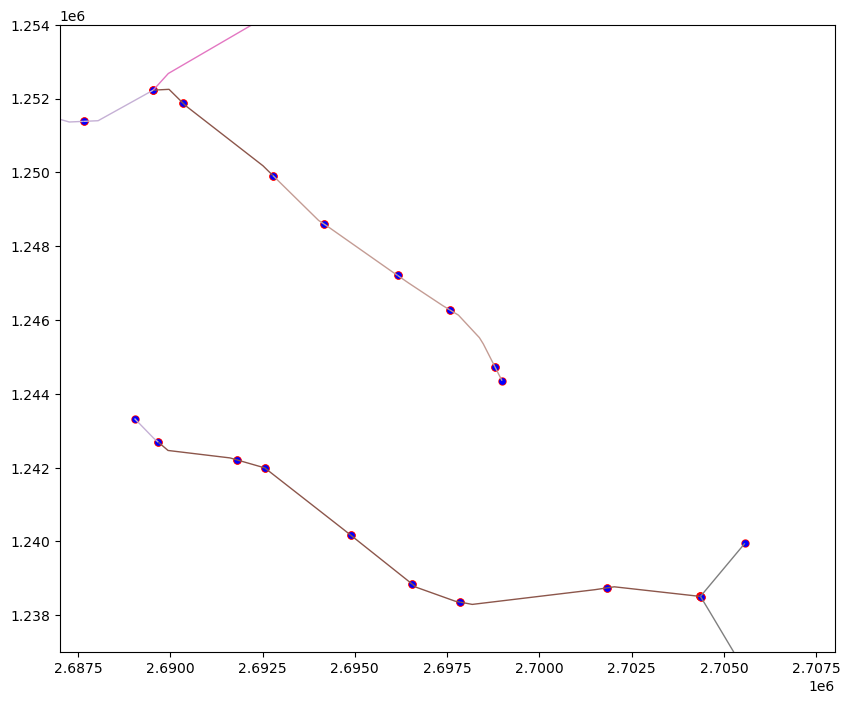

In [16]:
# Load the highway network
network = gpd.read_file(r"data/Network/processed/edges.gpkg")
'''
print(network.head())
print(network.is_empty.sum())  # Number of empty geometries
print(network.geometry.isna().sum())  # Number of NaN geometries'''


nodes_gdf = gpd.read_file(r"data/Network/processed/points_with_attribute.gpkg")

# get all the endpoints of the links by taking the first and last point of linestring
endpoints = network.geometry.apply(lambda x: x.boundary)
endpoints = gpd.GeoDataFrame(geometry=endpoints)
endpoints = endpoints.explode()
endpoints = endpoints.reset_index(drop=True)
print(endpoints.head())


# Plot the network
fig, ax = plt.subplots(figsize=(10, 10))
# Put the index into node_id column
network["node_id"] = network.index
# Plot the network such that each node has different color by index
endpoints.plot(ax=ax, color="red", markersize=25)
network.plot(ax=ax, column="node_id", cmap="tab20", linewidth=1)
nodes_gdf.plot(ax=ax, color="blue", markersize=15)
plot_limits(ax)
plt.show()

In [40]:
network = gpd.read_file(r"data/Network/processed/edges_with_attribute.gpkg")

print(network.head())
print(network.columns)

  start  end start_access end_access polygon_border capacity  ffs ID_edge  \
0   144  110            0          1              0     2305  117       0   
1   110  109            1          1              0     2351  107       1   
2   109  128            1          1              0     2337  117       2   
3   145  115            0          1              0     1998  102       3   
4   115  114            1          1              0     2333  120       4   

                                            geometry  
0  LINESTRING (2626913.13000 1257651.00000, 26257...  
1  LINESTRING (2649469.86421 1259366.38090, 26495...  
2  LINESTRING (2658816.80006 1255943.48974, 26591...  
3  LINESTRING (2636381.63968 1239333.20685, 26370...  
4  LINESTRING (2637089.74544 1239628.32292, 26372...  
Index(['start', 'end', 'start_access', 'end_access', 'polygon_border',
       'capacity', 'ffs', 'ID_edge', 'geometry'],
      dtype='object')
